In [1]:
import pandas as pd
df=pd.read_csv("Coursera.csv")

In [2]:
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


Checking for Null Values for Data Cleaning

In [3]:
df.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

Our Dataset is perfectly clean with no Null Values

##### Checking for duplicates

In [4]:
df.duplicated().sum()

98

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

Removing Not Calibrated Ratings

In [7]:
import re
df = df[df['Course Rating']!='Not Calibrated']
df['Course Rating'] = df['Course Rating'].apply(lambda x: float(re.findall(r'\d+\.\d+', str(x))[0]) if re.findall(r'\d+\.\d+', str(x)) else 0.0)
df['Course Rating'].value_counts()

Course Rating
4.7    707
4.6    602
4.8    585
4.5    380
4.4    235
4.9    174
4.3    159
0.0    154
4.2    120
4.1     85
3.8     24
3.9     20
3.6     18
3.7     18
3.5     17
3.4     13
3.2      9
3.3      6
2.9      6
2.6      2
2.8      2
2.4      2
3.1      1
2.5      1
1.9      1
2.3      1
Name: count, dtype: int64

In [8]:
df = df[df['Difficulty Level']!='Not Calibrated']
df['Difficulty Level'].value_counts()

Difficulty Level
Beginner        1387
Advanced         955
Intermediate     809
Conversant       143
Name: count, dtype: int64

Label Encoding for Difficulty Level

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Difficulty Level'] = le.fit_transform(df['Difficulty Level'])

In [10]:
df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,1,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,1,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,0,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,3,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,1,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,1,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,3,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,0,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,1,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


Extracting Amrita Dataset

In [11]:
amritadata=pd.read_csv("AVVCourses.csv")

In [12]:
amritadata.head(5)

,Course Code,Course name,Description
0,19ENG111,Technical Communication,The core objectives are to imbue students with...
1,19MAT101,Single Variable Calculus,This educational module aims to equip learners...
2,19MAT102,Matrix Algebra,This educational module focuses on building a ...
3,19MAT111,Multivariable Calculus,This module seeks to accomplish several key ob...
4,19CSE100,Problem Solving and Algorithmic Thinking,This course serves as the bedrock for computat...


In [13]:
amritadata.isnull().sum()

Course Code    0
Course name    0
Description    0
dtype: int64

In [14]:
import pandas as pd
import nltk
from nltk.tokenize import PunktSentenceTokenizer

# Download NLTK resources (if not already downloaded)
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [15]:
df.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')

<h3> NAMED ENTITY </h3>

In [16]:
import pandas as pd
import nltk
from nltk.tokenize import PunktSentenceTokenizer


# Initialize the sentence tokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to extract named entities from a text
def extract_named_entities(text):
    # Tokenize sentences
    sentences = sentence_tokenizer.tokenize(text)
    named_entities = {
        "ORGANIZATION": [],
        "PERSON": [],
        "GPE": [],
        "DATE": [],
        "TIME": [],
        "MONEY": [],
        "PERCENT": [],
        "FACILITY": [],
        "GSP": []
    }

    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(words)
        named_entities_tree = nltk.ne_chunk(tagged, binary=False)

        # Extract named entities by type
        for subtree in named_entities_tree:
            if isinstance(subtree, nltk.Tree):
                entity_type = subtree.label()
                entity_text = ' '.join([token for token, tag in subtree.leaves()])

                # Handle 'GPE' instead of 'LOCATION'
                if entity_type == 'LOCATION':
                    entity_type = 'GPE'

                named_entities[entity_type].append(entity_text)

    return named_entities



In [17]:
nltk.download('all')
NE=[]
for i in df["Course Description"]:
  NE.append(extract_named_entities(i))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]    | 

In [18]:
NEDF = pd.DataFrame(NE)

Replaceing Empty list with NA

In [19]:
NEDF = NEDF.applymap(lambda x: "NA" if isinstance(x, list) and len(x) == 0 else x)

In [20]:
NEDF

,ORGANIZATION,PERSON,GPE,DATE,TIME,MONEY,PERCENT,FACILITY,GSP
0,"[TRAILER, Learner, Screenplay, Experiential, A...","[Length Feature Film Script, Wheeler, Learner,...",NA,NA,NA,NA,NA,NA,NA
1,"[Business Model Canvas, Miro]",NA,NA,NA,NA,NA,NA,NA,NA
2,[MOOC],"[Silicon Solar Cells, Silicon]","[Ecole, Silicon]",NA,NA,NA,NA,NA,NA
3,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,"[SQL, Internal Revenue Service, SQL, SQL, SQL,...",NA,"[Database, Data, Note, North America]",NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...
3289,NA,"[Python, Python]",NA,NA,NA,NA,NA,NA,NA
3290,"[Forgotten Founder, American Revolution, Revol...","[Patrick Henry, Henry, Thomas Jefferson, Patri...","[Henry, U.S., George, U.S., Virginia, Britain,...",NA,NA,NA,NA,NA,NA
3291,NA,NA,[Via],NA,NA,NA,NA,NA,NA
3292,[Mechanical Engineering],NA,[Newton],NA,NA,NA,NA,NA,NA


In [21]:
merged_df = pd.merge(df, NEDF, left_index=True, right_index=True)


In [22]:
merged_df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,ORGANIZATION,PERSON,GPE,DATE,TIME,MONEY,PERCENT,FACILITY,GSP
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,1,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,"[TRAILER, Learner, Screenplay, Experiential, A...","[Length Feature Film Script, Wheeler, Learner,...",NA,NA,NA,NA,NA,NA,NA
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,1,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,"[Business Model Canvas, Miro]",NA,NA,NA,NA,NA,NA,NA,NA
2,Silicon Thin Film Solar Cells,�cole Polytechnique,0,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,[MOOC],"[Silicon Solar Cells, Silicon]","[Ecole, Silicon]",NA,NA,NA,NA,NA,NA
3,Finance for Managers,IESE Business School,3,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,1,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,"[SQL, Internal Revenue Service, SQL, SQL, SQL,...",NA,"[Database, Data, Note, North America]",NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,"Modern Robotics, Course 2: Robot Kinematics",Northwestern University,3,4.9,https://www.coursera.org/learn/modernrobotics-...,Do you want to know how robots work? Are you ...,robotics linear equation forward kinematics ...,"[CPU, Spark, Machine, CPUs, Kagglers, SQL, Apa...","[Apache Spark, Apache, Apache Spark, Apache Sp...","[Enrol, Amazon]",NA,NA,NA,NA,NA,NA
3289,Heritage under Threat,Universiteit Leiden,3,4.6,https://www.coursera.org/learn/heritage-protec...,In this course you will learn to articulate y...,ethnoarchaeology law international law thre...,NA,"[Python, Python]",NA,NA,NA,NA,NA,NA,NA
3290,Build a Firebase Android Application (Part II),Coursera Project Network,0,4.5,https://www.coursera.org/learn/firebase-androi...,This 1.5 hours project-bases course is a conti...,security Data Structures cloud computing sec...,"[Forgotten Founder, American Revolution, Revol...","[Patrick Henry, Henry, Thomas Jefferson, Patri...","[Henry, U.S., George, U.S., Virginia, Britain,...",NA,NA,NA,NA,NA,NA
3291,Interest Rate Models,�cole Polytechnique F�d�rale de Lausanne,0,4.3,https://www.coursera.org/learn/interest-rate-m...,This course gives you an easy introduction to ...,libor Stochastic Calculus valuation of optio...,NA,NA,[Via],NA,NA,NA,NA,NA,NA


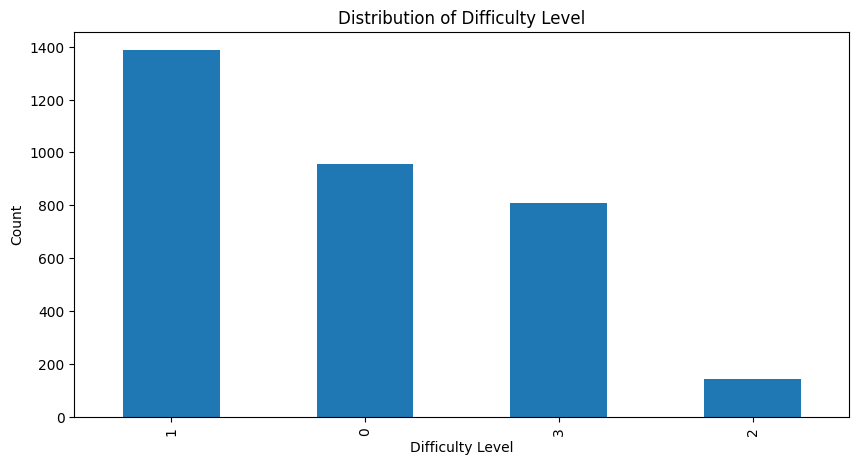

In [23]:
import matplotlib.pyplot as plt
# Plotting the distribution of difficulty level
plt.figure(figsize=(10,5))
plt.title('Distribution of Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
df['Difficulty Level'].value_counts().plot(kind='bar')
plt.show()

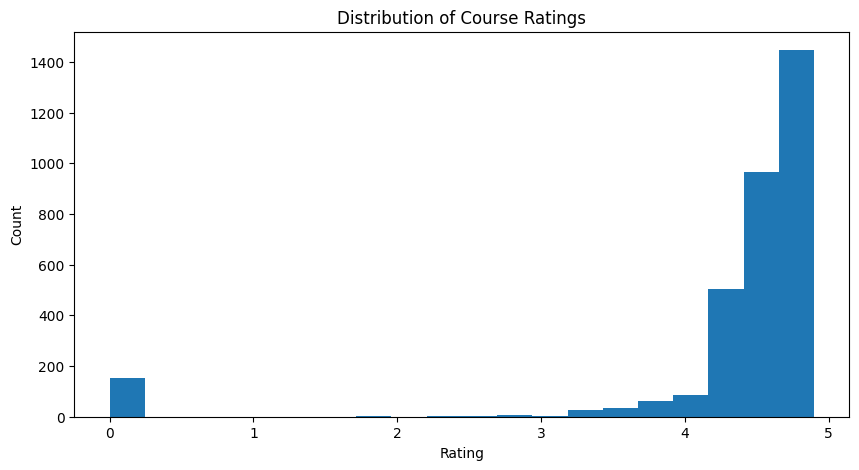

In [24]:
plt.figure(figsize=(10,5))
plt.hist(df['Course Rating'],bins=20)
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Creating a Preprocessing functions to remove stopwords and special characters using NLTK

In [25]:
merged_df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,ORGANIZATION,PERSON,GPE,DATE,TIME,MONEY,PERCENT,FACILITY,GSP
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,1,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,"[TRAILER, Learner, Screenplay, Experiential, A...","[Length Feature Film Script, Wheeler, Learner,...",NA,NA,NA,NA,NA,NA,NA
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,1,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,"[Business Model Canvas, Miro]",NA,NA,NA,NA,NA,NA,NA,NA
2,Silicon Thin Film Solar Cells,�cole Polytechnique,0,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,[MOOC],"[Silicon Solar Cells, Silicon]","[Ecole, Silicon]",NA,NA,NA,NA,NA,NA
3,Finance for Managers,IESE Business School,3,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,1,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,"[SQL, Internal Revenue Service, SQL, SQL, SQL,...",NA,"[Database, Data, Note, North America]",NA,NA,NA,NA,NA,NA


DATA PREPROCESSING - REMOVING STOP WORDS AND SPECIAL CHARACTERS

In [26]:
import pandas as pd

# Import NLTK and define the preprocessing functions as shown earlier
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def remove_stopwords(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

def remove_special_characters(text):
    special_chars = set(string.punctuation)
    cleaned_text = ''.join(char for char in text if char not in special_chars)
    return cleaned_text

# Apply preprocessing functions to the "Course Description" column
merged_df['Preprocessed'] = merged_df['Course Description'].apply(remove_stopwords)
merged_df['Preprocessed'] = merged_df['Preprocessed'].apply(remove_special_characters)

# Replace the "Course Description" column with the "Preprocessed" column
merged_df.drop(columns=['Course Description'], inplace=True)
merged_df.rename(columns={'Preprocessed': 'Course Description'}, inplace=True)

# Print the updated DataFrame
print(merged_df)


                                            Course Name  \
0     Write A Feature Length Screenplay For Film Or ...   
1     Business Strategy: Business Model Canvas Analy...   
2                         Silicon Thin Film Solar Cells   
3                                  Finance for Managers   
4          Retrieve Data using Single-Table SQL Queries   
...                                                 ...   
3288       Modern Robotics, Course 2:  Robot Kinematics   
3289                              Heritage under Threat   
3290     Build a Firebase Android Application (Part II)   
3291                               Interest Rate Models   
3293               Create a Google Ads Display Campaign   

                                    University  Difficulty Level  \
0                    Michigan State University                 1   
1                     Coursera Project Network                 1   
2                          �cole Polytechnique                 0   
3                  

In [27]:
merged_df["Course Description"][0]

'Write Full Length Feature Film Script course  write complete  featurelength screenplay film television  serious drama romantic comedy anything  You�ll learn break creative process components  you�ll discover structured process allows produce polished pitchready script end course  Completing project increase confidence ideas abilities  you�ll feel prepared pitch first script get started next  course designed tap creativity based  Active Learning   actual learning takes place within activities   writing  learn  link TRAILER course  view trailer  please copy paste link browser  https  vimeocom382067900b78b800dc0 Learner review   Love approach Professor Wheeler takes towards course  s point  easy follow  informative  Would definitely recommend anyone interested taking Screenplay Writing course  course curriculum simple  adopt professional writers room process you�ll write  post work peer review  share feedback peers revise work feedback receive peers  s real world  feel professional write

Preprocessing "Course Name" Column

In [29]:
# Apply preprocessing functions to the "Course Name" column
merged_df['Preprocessed'] = merged_df['Course Name'].apply(remove_stopwords)
merged_df['Preprocessed'] = merged_df['Preprocessed'].apply(remove_special_characters)

# Replace the "Course Name" column with the "Preprocessed" column
merged_df.drop(columns=['Course Name'], inplace=True)
merged_df.rename(columns={'Preprocessed': 'Course Name'}, inplace=True)

In [31]:
Coursera_Data = merged_df[['Course Name', 'Course Description']]

In [32]:
Coursera_Data.head()

,Course Name,Course Description
0,Write Feature Length Screenplay Film Television,Write Full Length Feature Film Script course ...
1,Business Strategy Business Model Canvas Analys...,end guided project fluent identifying creatin...
2,Silicon Thin Film Solar Cells,course consists general presentation solar cel...
3,Finance Managers,comes numbers always meets eye operational f...
4,Retrieve Data using SingleTable SQL Queries,course you�ll learn effectively retrieve data ...


As of now we have completed preprocessing our Courseera Dataset

**Now Let's Do Preprocessing for Amrita Dataset**

In [33]:
amritadata.head()

,Course Code,Course name,Description
0,19ENG111,Technical Communication,The core objectives are to imbue students with...
1,19MAT101,Single Variable Calculus,This educational module aims to equip learners...
2,19MAT102,Matrix Algebra,This educational module focuses on building a ...
3,19MAT111,Multivariable Calculus,This module seeks to accomplish several key ob...
4,19CSE100,Problem Solving and Algorithmic Thinking,This course serves as the bedrock for computat...


In [34]:
# Apply preprocessing functions to the "Course Description" column
amritadata['Preprocessed'] = amritadata['Description'].apply(remove_stopwords)
amritadata['Preprocessed'] = amritadata['Preprocessed'].apply(remove_special_characters)

# Replace the "Course Description" column with the "Preprocessed" column
amritadata.drop(columns=['Description'], inplace=True)
amritadata.rename(columns={'Preprocessed': 'Course Description'}, inplace=True)

In [35]:
amritadata.head()

,Course Code,Course name,Course Description
0,19ENG111,Technical Communication,core objectives imbue students deep understand...
1,19MAT101,Single Variable Calculus,educational module aims equip learners compreh...
2,19MAT102,Matrix Algebra,educational module focuses building solid comp...
3,19MAT111,Multivariable Calculus,module seeks accomplish several key objectives...
4,19CSE100,Problem Solving and Algorithmic Thinking,course serves bedrock computational problemsol...


In [36]:
# Apply preprocessing functions to the "Course Description" column
amritadata['Preprocessed'] = amritadata['Course name'].apply(remove_stopwords)
amritadata['Preprocessed'] = amritadata['Preprocessed'].apply(remove_special_characters)

# Replace the "Course Description" column with the "Preprocessed" column
amritadata.drop(columns=['Course name'], inplace=True)
amritadata.rename(columns={'Preprocessed': 'Course name'}, inplace=True)

In [37]:
amritadata.head()

,Course Code,Course Description,Course name
0,19ENG111,core objectives imbue students deep understand...,Technical Communication
1,19MAT101,educational module aims equip learners compreh...,Single Variable Calculus
2,19MAT102,educational module focuses building solid comp...,Matrix Algebra
3,19MAT111,module seeks accomplish several key objectives...,Multivariable Calculus
4,19CSE100,course serves bedrock computational problemsol...,Problem Solving Algorithmic Thinking


FEATURE SELECTION

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
count_vect = CountVectorizer()
cv_mat = count_vect.fit_transform(merged_df['Course Description'])

In [39]:
cv_mat

<3086x21296 sparse matrix of type '<class 'numpy.int64'>'
	with 235417 stored elements in Compressed Sparse Row format>

In [40]:
#Dense
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
df_cv_words = pd.DataFrame(cv_mat.todense(), columns=count_vect.get_feature_names_out())

In [42]:
df_cv_words.head()

,000,02,0387999919191h01p,055,09292022,09302019,0angry,0s,10,100,...,zstatistic,ztests,zu,zuckerman,zum,zumnedu1a5q,zurich,zuversicht,zwetsloot,zwijnenberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Cosine Similarity**

In [43]:
cosine_sim_mat = cosine_similarity(cv_mat)

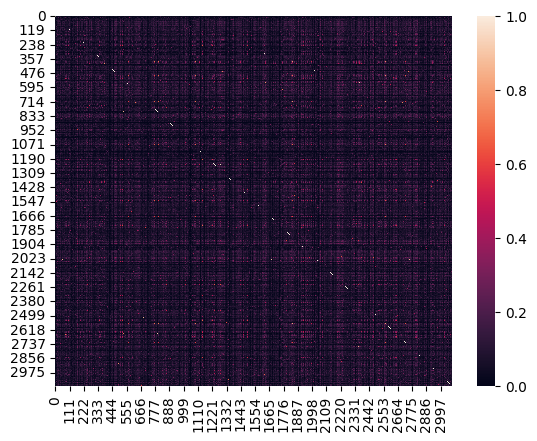

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
sns.heatmap(cosine_sim_mat)

# Show the plot
plt.show()


Formatting the Index Numbers

In [51]:
indices = pd.Series(merged_df.index, index=merged_df['Course Name']).drop_duplicates()

Training the SVM Model

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics.pairwise import linear_kernel

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['Course Description'])

# Fit a LinearSVC model to classify courses
svm_model = LinearSVC()
svm_model.fit(tfidf_matrix, merged_df['Course Name'])


c:\Users\vigne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

Recommendation Function

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_courses(course_description, num_recommendations=3500):
    # Transform the input course description into a TF-IDF vector
    input_tfidf = tfidf_vectorizer.transform([course_description])

    # Predict classes for all courses based on the input description
    predicted_classes = svm_model.decision_function(input_tfidf)

    # Sort the courses based on the predicted classes
    top_courses_indices = predicted_classes.argsort()[0][::-1][:num_recommendations]

    # Get the recommended course names and ratings from SVM model
    recommended_courses_svm = merged_df.iloc[top_courses_indices][['Course Name', 'Course Rating', 'Course URL']]

    # Now, let's analyze the recommended courses using cosine similarity
    # Transform the recommended courses into TF-IDF vectors
    recommended_tfidf_matrix = tfidf_vectorizer.transform(recommended_courses_svm['Course Name'])

    # Calculate cosine similarities between the input course description and recommended courses
    cosine_similarities = cosine_similarity(input_tfidf, recommended_tfidf_matrix).flatten()

    # Sort the recommended courses based on cosine similarities
    related_docs_indices = cosine_similarities.argsort()[::-1]

    # Get the final list of recommended courses after analyzing with cosine similarity
    final_recommendations = recommended_courses_svm.iloc[related_docs_indices]

    # Calculate similarity score between input course description and recommended courses
    similarity_score = cosine_similarities[related_docs_indices]

    # Add similarity score to final recommendations DataFrame
    final_recommendations['Similarity Score'] = similarity_score

    return final_recommendations


In [60]:
input_course_description = input("Enter the course description: ")
recommended_courses = recommend_courses(input_course_description)
df_recommend = pd.DataFrame(recommended_courses)
df_recommend.head()

C:\Users\vigne\AppData\Local\Temp\ipykernel_17620\439376563.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_recommendations['Similarity Score'] = similarity_score


,Course Name,Course Rating,Course URL,Similarity Score
1186,Understanding Music Business Music Worth,4.5,https://www.coursera.org/learn/musicbiz,0.807987
538,Building Career Music Developing Brand Funding...,4.3,https://www.coursera.org/learn/navigate-music-...,0.705567
1246,Fundamentals Music Theory,4.2,https://www.coursera.org/learn/edinburgh-music...,0.679634
2954,Music Business Foundations,4.8,https://www.coursera.org/learn/music-business-...,0.679284
900,Music Social Action,4.6,https://www.coursera.org/learn/music-and-socia...,0.662296


Training Score

In [55]:
svm_model.score(tfidf_matrix, merged_df['Course Name'])

0.9922229423201555